In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
artist_df = pd.read_csv("data_by_artist.csv")
artist_df_unique = artist_df.drop_duplicates(["artists"])
artist_df_unique.head()

,artists,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,count
0,"""Cats"" 1981 Original London Cast",0.575083,0.442750,247260.000000,0.386336,0.022717,0.287708,-14.205417,0.180675,115.983500,0.334433,38.000000,5,1,12
1,"""Cats"" 1983 Broadway Cast",0.862538,0.441731,287280.000000,0.406808,0.081158,0.315215,-10.690000,0.176212,103.044154,0.268865,33.076923,5,1,26
2,"""Fiddler On The Roof” Motion Picture Chorus",0.856571,0.348286,328920.000000,0.286571,0.024593,0.325786,-15.230714,0.118514,77.375857,0.354857,34.285714,0,1,7
3,"""Fiddler On The Roof” Motion Picture Orchestra",0.884926,0.425074,262890.962963,0.245770,0.073587,0.275481,-15.639370,0.123200,88.667630,0.372030,34.444444,0,1,27
4,"""Joseph And The Amazing Technicolor Dreamcoat""...",0.605444,0.437333,232428.111111,0.429333,0.037534,0.216111,-11.447222,0.086000,120.329667,0.458667,42.555556,11,1,9


#### Removing artist names for Normalization

In [3]:
artist_df_temp = artist_df_unique.drop(["artists"],axis=1)

In [4]:
artist_scaled = StandardScaler().fit_transform(artist_df_temp)

In [5]:
print(artist_scaled)

[[ 0.19046992 -0.57730632  0.08077245 ... -0.11760966  0.55090127
  -0.04294901]
 [ 0.96783492 -0.58309428  0.41158607 ... -0.11760966  0.55090127
   0.21695495]
 [ 0.95169827 -1.11374502  0.75579096 ... -1.55207768  0.55090127
  -0.13577185]
 ...
 [ 0.75937686  0.14996037 -0.51999298 ... -0.11760966  0.55090127
  -0.06151357]
 [ 1.137136   -1.26152763 -0.20251167 ...  1.31685837  0.55090127
   0.51398805]
 [-0.33438969 -1.08697379  0.65031415 ...  1.60375198  0.55090127
  -0.22859469]]


In [6]:
scaled_features_df = pd.DataFrame(artist_scaled, index=artist_df_temp.index, columns=artist_df_temp.columns)

In [7]:
scaled_features_df.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,count
0,0.190470,-0.577306,0.080772,-0.423459,-0.492742,0.599432,-0.512596,0.728032,0.021651,-0.746399,0.167913,-0.117610,0.550901,-0.042949
1,0.967835,-0.583094,0.411586,-0.342721,-0.292690,0.795479,0.091503,0.689574,-0.493081,-1.015894,-0.054812,-0.117610,0.550901,0.216955
2,0.951698,-1.113745,0.755791,-0.816912,-0.486322,0.870815,-0.688786,0.192440,-1.514176,-0.662454,-0.000125,-1.552078,0.550901,-0.135772
3,1.028377,-0.677683,0.209981,-0.977824,-0.318606,0.512290,-0.759011,0.232813,-1.064985,-0.591872,0.007056,-1.552078,0.550901,0.235520
4,0.272575,-0.608066,-0.041831,-0.253884,-0.442024,0.089150,-0.038620,-0.087711,0.194543,-0.235780,0.374012,1.603752,0.550901,-0.098643


In [8]:
scaled_features_df.sort_values("popularity", ascending=False, inplace=True)
scaled_features_df[scaled_features_df["popularity"]>0].count()
# print(scaled_features_df.shape)

acousticness        16143
danceability        16143
duration_ms         16143
energy              16143
instrumentalness    16143
liveness            16143
loudness            16143
speechiness         16143
tempo               16143
valence             16143
popularity          16143
key                 16143
mode                16143
count               16143
dtype: int64

Text(0.5, 1.0, 'Plot for top 1000 popular songs for all times')

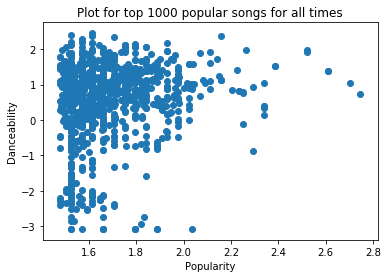

In [9]:
data_size = 1000
sample = scaled_features_df.head(data_size)
plt.scatter(sample.popularity.values, sample.danceability.values)
plt.xlabel("Popularity")
plt.ylabel("Danceability")
plt.title("Plot for top {} popular songs for all times".format(data_size))

Text(0.5, 1.0, 'Plot for top 1000 popular songs for all times')

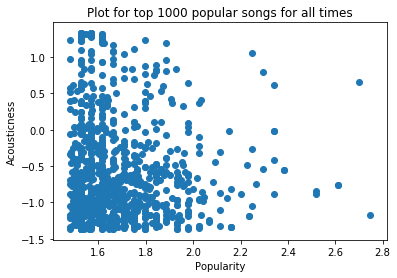

In [10]:

data_size = 1000
sample = scaled_features_df.head(data_size)
# print(sample[sample["acousticness"]>0].count())
plt.scatter(sample.popularity.values, sample.acousticness.values)
plt.xlabel("Popularity")
plt.ylabel("Acousticness")
plt.title("Plot for top {} popular songs for all times".format(data_size))

Text(0.5, 1.0, 'Plot for top 1000 popular songs for all times')

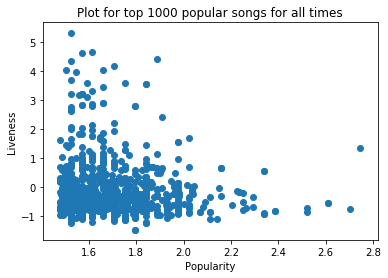

In [11]:

data_size = 1000
sample = scaled_features_df.head(data_size)
# print(sample[sample["liveness"]>0].count())
plt.scatter(sample.popularity.values, sample.liveness.values)
plt.xlabel("Popularity")
plt.ylabel("Liveness")
plt.title("Plot for top {} popular songs for all times".format(data_size))

Text(0.5, 1.0, 'Relationship between Tempo and Popularity for 1000 most popular songs')

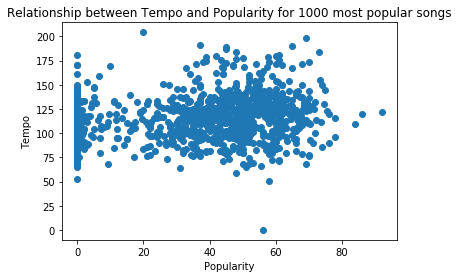

In [12]:
data_size = 1000
# sample = scaled_features_df.head(data_size)
sample = artist_df_unique.head(data_size)
plt.scatter(sample.popularity.values, sample.tempo.values)
plt.xlabel("Popularity")
plt.ylabel("Tempo")
plt.title("Relationship between Tempo and Popularity for {} most popular songs".format(data_size))
# sample.mean()


Text(0.5, 1.0, 'Relationship between Tempo and Popularity for 1000 most popular songs')

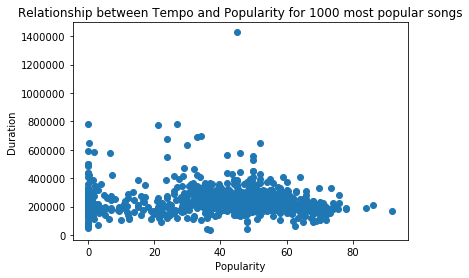

In [14]:
data_size = 1000
# sample = scaled_features_df.head(data_size)
sample = artist_df_unique.head(data_size)
plt.scatter(sample.popularity.values, sample.duration_ms.values)
plt.xlabel("Popularity")
plt.ylabel("Duration")
plt.title("Relationship between Tempo and Popularity for {} most popular songs".format(data_size))
